# Chapter 1

## Time series data versus IID data 

A typical setup for statistical analysis assumes that a series of experiments generate observations that are independent and identically distributed~(often abbreviated i.i.d). 
For example, 

\begin{align}
    \mathcal{D} &= ( y_{1}, y_{2}, \cdots, y_{n}   ) \\ 
    y_{i} &\sim \text{Poisson}(\lambda)
\end{align}

where we use $\mathcal{D}$ to represent a dataset, lower case letters to represent collected observations, capital letters to represent random variables, and greek letters to represent parameters. 
Because we assume that the above observations were generated from a sequence of i.i.d poisson random variables, we can simplify expressions that incldue the probability of $Y_{1}, Y_{2}, \cdots$. 

\begin{align}
    P(Y_{1}, Y_{2}) &= P(Y_{1}) \cdot P(Y_{2}) \\ 
    P(Y_{1}, Y_{2}, \cdots, Y_{n}) &= P(Y_{1}) \cdot P(Y_{2}) \cdots P(Y_{n}) = \prod_{i=1}^{n} P(Y_{i}) \\ 
    & = \lambda^{\sum_{i=1}^{n} y_{i} } \frac{e^{ -n\lambda }}{ \prod_{i=1}^{n} y_{i}! } \propto e^{ -n\lambda }\lambda^{\sum_{i=1}^{n} y_{i} }
\end{align}

The expression above is an (often good) approximation of the joint probability of observing all $n$ data points at once. 
Unlike more traditional data collections mechanisms, for time series data we cannot assume that the observations are i.i.d.
Instead, we assume that observations at time $t$ deoend on all previous random variables before time $t$. 
Then, we cannot simplify the joint probability of the first $t$ random variables as their product. 

Recall the multiplication rule 

\begin{align}
    P(A,B,C) &= P( B,C | A ) P(A) \\ 
              &= P( C | B, A ) P(B|A) P(A)
\end{align}

We can still use the multiplication rule to assess the joint probability of a sequence of random variables.
Lets assume that we wish to model some time seres process from time unit one up until time unit $T$. 
Then we need to estimate probabilities like 

\begin{align}
    P( Y_{1}, Y_{2}, \cdots, Y_{T}  ) = P(Y_{0})\cdot P(Y_{1} | Y_{0}) \cdot P(Y_{2} | Y_{1},Y_{0}) \cdots P(Y_{T} | Y_{T-1} \cdots Y_{0})
\end{align}

The i.i.d assumption simplifies the above by assuming that each random variable is independent of all others. 
For time series, we want to simplify the above but still keep the most important characteristics of the process---that observations in the future depend on the past. 

### Markov Assumption 

Given a series of random variables, the Markov assumption states that the probability of $Y_{t}$ depends only on the random variable at time $t-1$, or 

\begin{align}
    P(Y_{t} | Y_{t-1}, Y_{t-2}, \cdots Y_{1}) \approx  P(Y_{t} | Y_{t-1})
\end{align}

The markov assumption aims to capture the most basic attribute of a time series, that future values depend on the recent past, without the more restrictive property that future values depend on **all** of the past. 

This simplified considerably the above 

\begin{align}
    P( Y_{1}, Y_{2}, \cdots, Y_{T}  ) &= P(Y_{0})\cdot P(Y_{1} | Y_{0}) \cdot P(Y_{2} | Y_{1},Y_{0}) \cdots P(Y_{T} | Y_{T-1} \cdots Y_{0}) \\ 
    & \approx P(Y_{0}) \cdot P(Y_{1} | Y_{0}) \cdot P(Y_{2} | Y_{1}) \cdots  \\ 
    & = P(Y_{0}) \prod_{t=1}^{T} P(Y_{t} | Y_{t-1})
\end{align}



## Influenza-like illness

The Centers for Disease Control and Prevention collect a dataset about influenza-like illness,or ILI.
ILI is a non-specific syndrome defined as fever  and cough and/or sore throat. It is used for flu surveillance worldwide. ILI can be caused by influenza virus infection and infections with other respiratory viruses.

### Why is it important ?
### How is it used ?
### What does it inform ?
### Are there any weirdnesses with it ? For example ILI is 2 weeks behind. 
### Picture of HHS 1, 2, 3 and National
### Print print the first 5 lines and describe the variables in this dataset. 
### Describe all variables ( i know this is laborious) 
### Build a scatterplot of ILI at time t versus ILI at time t-1 for national level. 
#### put a line of best fit on there and the correlation value. 
### Build a scatterplot of ILI at time t versus ILI at time t-7 for national level. 
#### put a line of best fit on there and the correlation value.

     release_date region   issue  epiweek  lag  num_ili  num_patients  \
0      2017-10-24   hhs1  201740   201501  143      915         48019   
1      2017-10-24  hhs10  201740   201501  143      446         13386   
2      2017-10-24   hhs2  201740   201501  143     4203        125197   
3      2017-10-24   hhs3  201740   201501  143     7757        131608   
4      2017-10-24   hhs4  201740   201501  143     4653        126559   
...           ...    ...     ...      ...  ...      ...           ...   
6298   2026-01-23   hhs6  202602   202552    3    14037        130302   
6299   2026-01-23   hhs7  202602   202552    3     4292         53233   
6300   2026-01-23   hhs8  202602   202552    3     7132         90624   
6301   2026-01-23   hhs9  202602   202552    3    18825        337178   
6302   2026-01-23    nat  202602   202552    3   214831       2534874   

      num_providers  num_age_0  num_age_1  num_age_2  num_age_3  num_age_4  \
0               151        241        341    

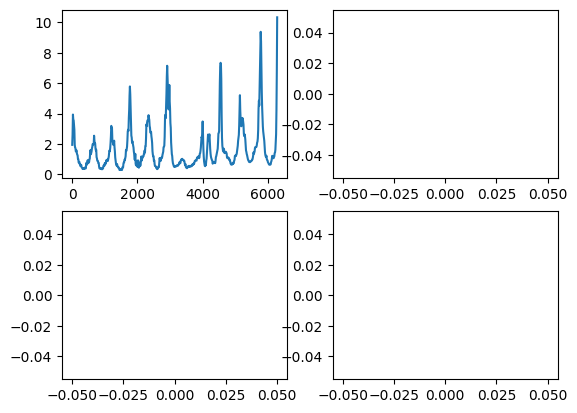

In [24]:
#--d 
import pandas as pd 
import matplotlib.pyplot as plt 

d = pd.read_csv("./data/ili_data.csv")  #<--using pandas to import a datset


#--plot ILI for all states in HHS1 
#--plot ILI for all states in HHS2
#--plot ILI for all states in HHS3
#--plot ILI for all states in HHS6

fig, axs = plt.subplots( 2,2  )  #<--This begins a figure and axes object.

d_hhs1 = d.loc[ d.region == "hhs1" ]

axs[0,0].plot( d_hhs1["wili"]    )            #<--This does blah blah blah
axs[0,1].plot()
axs[1,0].plot()
axs[1,1].plot()




# plot time series for two state
#x is weeks
#y is percent ili (column_name = wILI)

print(d)

In [21]:
#--d 
d.region.unique()

array(['hhs1', 'hhs10', 'hhs2', 'hhs3', 'hhs4', 'hhs5', 'hhs6', 'hhs7',
       'hhs8', 'hhs9', 'nat'], dtype=object)

## COVID Community mobility

COVID Community Mobility Reports aim to provide insights into what changed in response to policies aimed at combating COVID-19. The reports charted movement trends over time by geography, across different categories of places such as retail and recreation, groceries and pharmacies, parks, transit stations, workplaces, and residential.

In [3]:
#--d 
import pandas as pd 

d = pd.read_csv("./data/pa_covid.csv")

# a plot of one county time seires for two activities

# x is the day 
# y - parks_percent_change_from_baseline (<-for example)


## Mpox incidence

## Correlation, Covariance, and the Corrolelogram

In [4]:
# FFor ili we will wantt to plot the percent ILI at week t versus the percent ILI at week t+1

In [5]:
# FFor COVID we will wantt to plot the behaviro at week t versus the behavior at week t+1

## Smoothing methods

#### It may be worth looking at 8.1,8.2,8.5



https://otexts.com/fpp3/holt.html